In [1]:
import pandas as pd 

df = pd.read_csv('Twitter_Data.csv')
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [3]:
def category(x):
    if x == 1.0:
        return 'Positive'
    elif x == 0.0:
        return 'Neutral'
    elif x == -1.0:
        return 'Negative'

In [4]:
df['sentiment'] = df['category'].apply(lambda x: category(x))

In [5]:
df.head(5)

,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive


# Pre-Processing

In [6]:
df['clean_text'] = df['clean_text'].astype(str)

In [7]:
import re
import string

def preprocess(text):
    text = re.sub(r'[^\w\s\']', ' ', text)
    text = re.sub(r' +', ' ', text)
    return text.strip().lower()

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_text']= df['clean_text'].apply(lambda x:remove_punctuation(x))
df['clean_text']= df['clean_text'].apply(lambda x:preprocess(x))
df.head()

,clean_text,category,sentiment
0,when modi promised minimum government maximum ...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp to...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive


In [8]:
df['sentiment'].value_counts()

Positive    72250
Neutral     55213
Negative    35510
Name: sentiment, dtype: int64

In [9]:
df.isna().sum()

clean_text    0
category      7
sentiment     7
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df['sentiment'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

Text(0.5, 1.0, 'Sentiment')

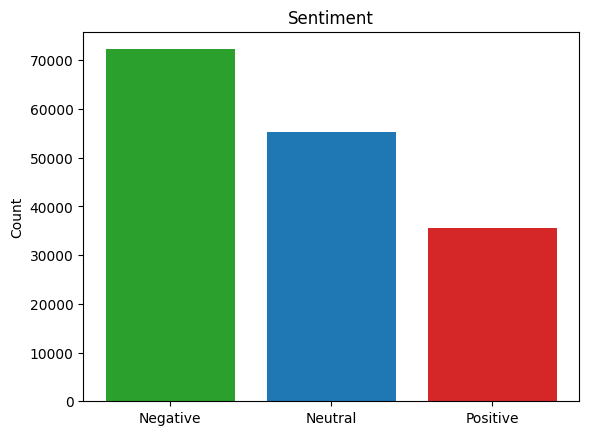

In [12]:
import matplotlib.pyplot as plt
# Membuat diagram review
fig, ax = plt.subplots()
count = [df[df['sentiment'] == 'Positive'].shape[0], df[df['sentiment'] == 'Neutral'].shape[0], df[df['sentiment'] == 'Negative'].shape[0]]
bar_colors = ['tab:green', 'tab:blue', 'tab:red']

ax.bar(df['sentiment'].unique(), count, label=['Positive', 'Neutral', 'Negative'], color=bar_colors)
ax.set_ylabel('Count')
ax.set_title('Sentiment')

In [13]:
df_pos = df[df['sentiment'] == 'Positive']
df_neg = df[df['sentiment'] == 'Negative']
df_neu = df[df['sentiment'] == 'Neutral']
df_pos_downsampled = df_pos.sample(df_neg.shape[0])
df_neu_downsampled = df_neu.sample(df_neg.shape[0])
df = pd.concat([df_pos_downsampled, df_neu_downsampled,df_neg])
df.head()

,clean_text,category,sentiment
17150,didnt get better thats cute top tyrell was the...,1.0,Positive
96645,agree bhai was saying that were very confident...,1.0,Positive
142799,been chennai recently every one spokewanted ep...,1.0,Positive
35103,waise modi full bjp majority modi amit shah nd...,1.0,Positive
10403,for anything everything you guys will have rea...,1.0,Positive


Text(0.5, 1.0, 'Sentiment')

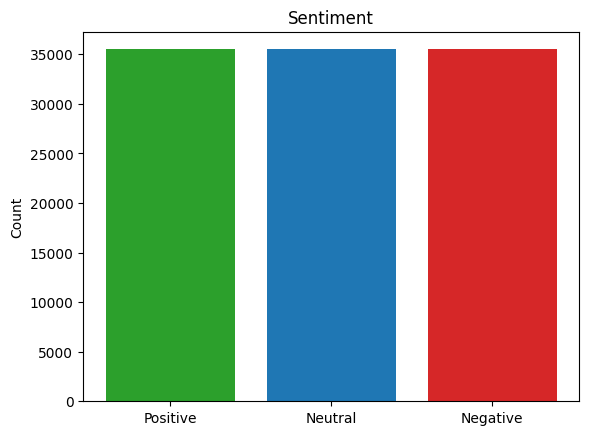

In [14]:
import matplotlib.pyplot as plt
# Membuat diagram review
fig, ax = plt.subplots()
count = [df[df['sentiment'] == 'Positive'].shape[0], df[df['sentiment'] == 'Neutral'].shape[0], df[df['sentiment'] == 'Negative'].shape[0]]
bar_colors = ['tab:green', 'tab:blue', 'tab:red']

ax.bar(df['sentiment'].unique(), count, label=['Positive', 'Neutral', 'Negative'], color=bar_colors)
ax.set_ylabel('Count')
ax.set_title('Sentiment')

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'],df['sentiment'], test_size=0.2)
vectorizer = CountVectorizer()

# Sentiment Analysis

Bag of Words

In [66]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [67]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [68]:
y_pred = clf.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.67      0.85      0.75      7167
     Neutral       0.91      0.61      0.73      7046
    Positive       0.74      0.78      0.76      7093

    accuracy                           0.75     21306
   macro avg       0.77      0.75      0.75     21306
weighted avg       0.77      0.75      0.75     21306



In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[6064,  211,  892],
       [1660, 4318, 1068],
       [1375,  199, 5519]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score

bow_score = accuracy_score(y_test, y_pred)
bow_score

0.7463155918520604

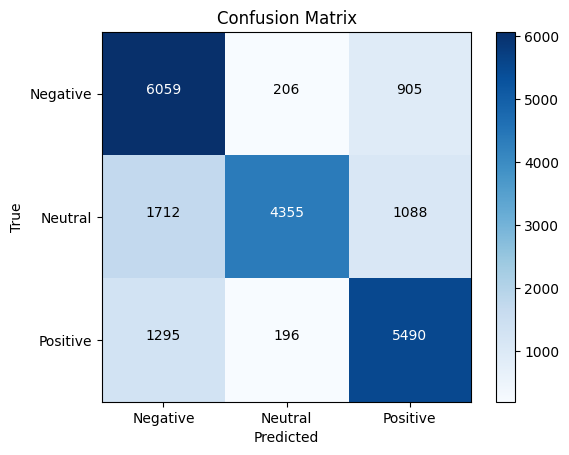

In [21]:
import matplotlib.pyplot as plt 
import numpy as np

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

Unigrams

In [22]:
from sklearn.pipeline import Pipeline

ngram_range = (1, 1)
max_features = 1000

# Create a CountVectorizer object with the specified n-gram range and maximum number of features
vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)

# Create a MultinomialNB object for classification
uni_clf = MultinomialNB()

# Create a Pipeline object to combine the vectorizer and classifier
uni_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('clf', uni_clf)
])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'],df['sentiment'], test_size=0.2)

In [24]:
uni_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(max_features=1000)),
                ('clf', MultinomialNB())])

In [25]:
uni_prediction = uni_pipeline.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,uni_prediction))

              precision    recall  f1-score   support

    Negative       0.69      0.72      0.71      6974
     Neutral       0.76      0.81      0.78      7157
    Positive       0.80      0.72      0.76      7175

    accuracy                           0.75     21306
   macro avg       0.75      0.75      0.75     21306
weighted avg       0.75      0.75      0.75     21306



In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, uni_prediction)
cm

array([[5044, 1031,  899],
       [1020, 5778,  359],
       [1254,  783, 5138]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

uni_score = accuracy_score(y_test, uni_prediction)
uni_score

0.7490847648549704

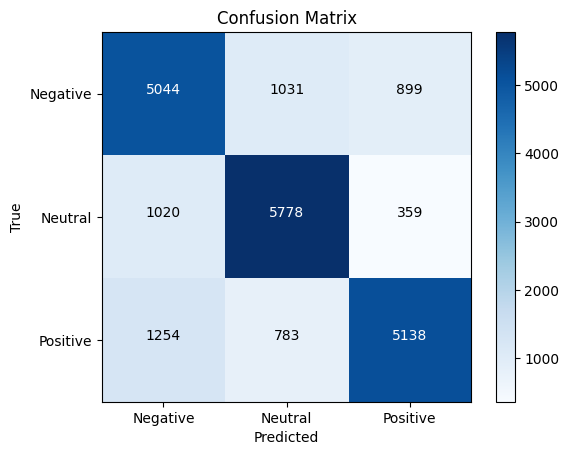

In [28]:
import matplotlib.pyplot as plt 
import numpy as np

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

Bigrams

In [29]:
ngram_range = (2, 2)
max_features = 1000

# Create a CountVectorizer object with the specified n-gram range and maximum number of features
vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)

# Create a MultinomialNB object for classification
bi_clf = MultinomialNB()

# Create a Pipeline object to combine the vectorizer and classifier
bi_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('clf', bi_clf)
])

In [30]:
bi_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=1000, ngram_range=(2, 2))),
                ('clf', MultinomialNB())])

In [31]:
bi_prediction = bi_pipeline.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, bi_prediction))

              precision    recall  f1-score   support

    Negative       0.42      0.55      0.48      6974
     Neutral       0.45      0.50      0.48      7157
    Positive       0.58      0.35      0.44      7175

    accuracy                           0.47     21306
   macro avg       0.49      0.47      0.46     21306
weighted avg       0.49      0.47      0.46     21306



In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, bi_prediction)
cm

array([[3849, 2069, 1056],
       [2842, 3569,  746],
       [2428, 2220, 2527]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

bi_score = accuracy_score(y_test, bi_prediction)
bi_score

0.46676992396508027

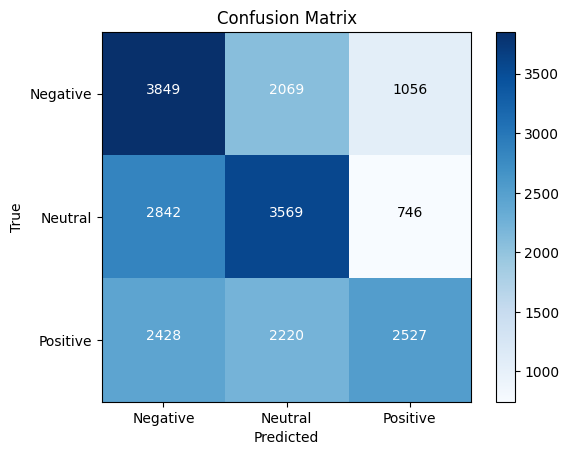

In [34]:
import matplotlib.pyplot as plt 
import numpy as np

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

Trigrams

In [35]:
ngram_range = (3, 3)
max_features = 1000

# Create a CountVectorizer object with the specified n-gram range and maximum number of features
vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)

# Create a MultinomialNB object for classification
tri_clf = MultinomialNB()

# Create a Pipeline object to combine the vectorizer and classifier
tri_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('clf', tri_clf)
])

In [36]:
tri_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=1000, ngram_range=(3, 3))),
                ('clf', MultinomialNB())])

In [37]:
tri_prediction = tri_pipeline.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tri_prediction))

              precision    recall  f1-score   support

    Negative       0.35      0.84      0.49      6974
     Neutral       0.44      0.16      0.24      7157
    Positive       0.56      0.15      0.23      7175

    accuracy                           0.38     21306
   macro avg       0.45      0.38      0.32     21306
weighted avg       0.45      0.38      0.32     21306



In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, tri_prediction)
cm

array([[5892,  658,  424],
       [5623, 1156,  378],
       [5336,  798, 1041]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score

tri_score = accuracy_score(y_test, tri_prediction)
tri_score

0.3796583122125223

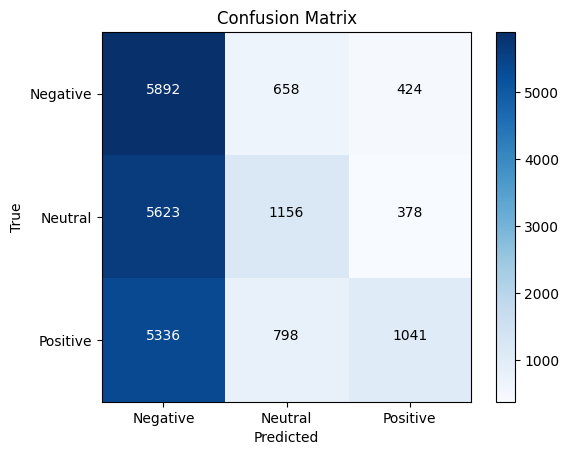

In [40]:
import matplotlib.pyplot as plt 
import numpy as np

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

TF-IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the maximum number of features
max_features = 1000

# Create a TfidfVectorizer object with the specified maximum number of features
vectorizer = TfidfVectorizer(max_features=max_features)

# Create a MultinomialNB object for classification
tf_clf = MultinomialNB()

# Create a Pipeline object to combine the vectorizer and classifier
tf_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('clf', tf_clf)
])

In [42]:
tf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=1000)),
                ('clf', MultinomialNB())])

In [43]:
tf_predicts = tf_pipeline.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tf_predicts))

              precision    recall  f1-score   support

    Negative       0.67      0.73      0.70      6974
     Neutral       0.76      0.79      0.77      7157
    Positive       0.81      0.70      0.75      7175

    accuracy                           0.74     21306
   macro avg       0.75      0.74      0.74     21306
weighted avg       0.75      0.74      0.74     21306



In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, tf_predicts)
cm

array([[5119, 1029,  826],
       [1150, 5652,  355],
       [1339,  786, 5050]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score

tf_score = accuracy_score(y_test, tf_predicts)
tf_score

0.7425607810006571

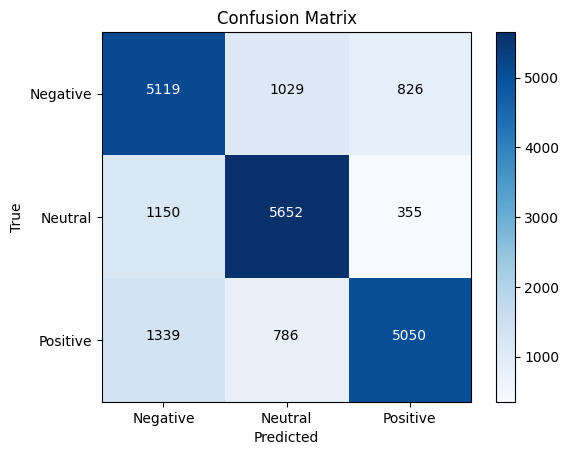

In [46]:
import matplotlib.pyplot as plt 
import numpy as np

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

Word2Vec

In [47]:
from gensim.models import Word2Vec
embedding_dim = 100


In [48]:
tokenized_training_data = [sentence.split() for sentence in X_train]

In [49]:
w2v = Word2Vec(sentences=tokenized_training_data, vector_size=embedding_dim, window=5, min_count=1, workers=4)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85224,), (21306,), (85224,), (21306,))

In [51]:
# Tokenize the test data
tokenized_test_data = [sentence.split() for sentence in X_test]

# Get the embeddings for the training and test data
training_data_embeddings = []
for sentence in tokenized_training_data:
    embeddings = [w2v.wv[word] for word in sentence if word in w2v.wv]
    if embeddings:
        training_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        training_data_embeddings.append([0] * embedding_dim)

test_data_embeddings = []
for sentence in tokenized_test_data:
    embeddings = [w2v.wv[word] for word in sentence if word in w2v.wv]
    if embeddings:
        test_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        test_data_embeddings.append([0] * embedding_dim)


In [52]:
from sklearn.linear_model import LogisticRegression

w2v_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
w2v_clf.fit(training_data_embeddings, y_train)

predicted_labels = w2v_clf.predict(test_data_embeddings)

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

    Negative       0.52      0.59      0.55      6974
     Neutral       0.62      0.61      0.62      7157
    Positive       0.59      0.52      0.56      7175

    accuracy                           0.57     21306
   macro avg       0.58      0.57      0.57     21306
weighted avg       0.58      0.57      0.57     21306



In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_labels)
cm

array([[4090, 1395, 1489],
       [1671, 4384, 1102],
       [2094, 1320, 3761]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score

w2v_score = accuracy_score(y_test, predicted_labels)
w2v_score

0.5742513845865015

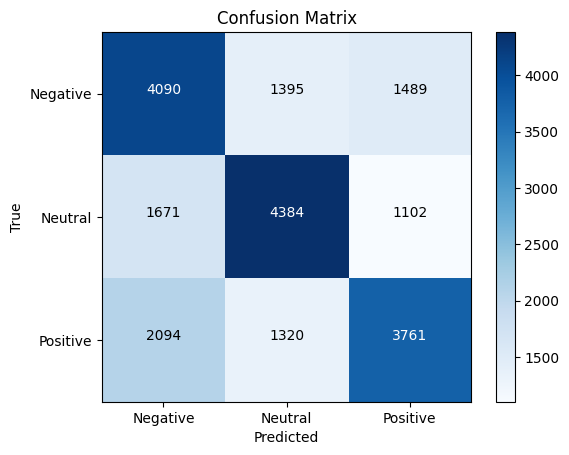

In [57]:
import matplotlib.pyplot as plt 
import numpy as np

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

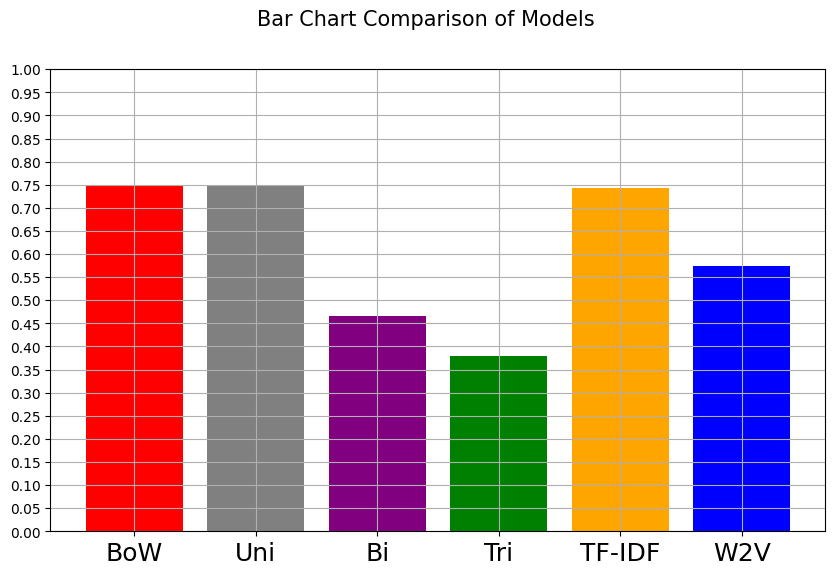

In [73]:
algorithms=("BoW","Uni","Bi","Tri","TF-IDF","W2V")
scores = (bow_score, uni_score, bi_score, tri_score, tf_score, w2v_score)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(10,6))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()